# DIABETES PREDICTION

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

Variables Description\
Pregnancies - Number of times pregnant\
Glucose - Plasma glucose concentration in an oral glucose tolerance test\
BloodPressure - Diastolic blood pressure (mm Hg)\
SkinThickness - Triceps skinfold thickness (mm)\
Insulin - Two hour serum insulin\
BMI - Body Mass Index\
DiabetesPedigreeFunction - Diabetes pedigree function\
Age - Age in years\
Outcome - Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0\

I will be doing alot of exploratory analysis to find out the relationship between diabetes and all the features.\

Before you start a project like this, you would want to have a basic understanding of diabetes and the features included in determining it. This is important so you can compare the relationship between what has been scientifically proven already and what is in this dataset. And if a feature in the dataset goes against what is known to be normal, then you know theres a problem with that feature


I will start by importing necessary libraries and reading in the data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('health care diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There doesnt seem to be any null values. Let me run a .describe to get further insight on the dataset

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There seems to be a bit of a problem here. we can see from above that the minimum value of the glucose, blood pressure, skin thickness, insulin and bmi columns is zero. This doesnt make sense because being realistic, one can not have a zero glucose level or zero blood pressure, same for the remaining 3

I am going to assume they are missing values and treat them as such.

I will represent the zero values with missing values

In [6]:
df['Glucose']= df['Glucose'].replace(0,np.nan)
df['BloodPressure']= df['BloodPressure'].replace(0,np.nan)
df['SkinThickness']= df['SkinThickness'].replace(0,np.nan)
df['Insulin']= df['Insulin'].replace(0,np.nan)
df['BMI']= df['BMI'].replace(0,np.nan)

In [7]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We can now see the number of missing values in the dataset and in each column. we would figure out a way to deal with these missing values later.

Let us explore the data first and see what trends we can find

<AxesSubplot:xlabel='Outcome', ylabel='count'>

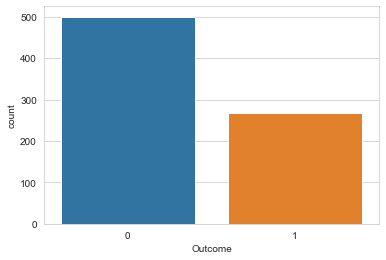

In [8]:
sns.countplot(data = df, x = 'Outcome')

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

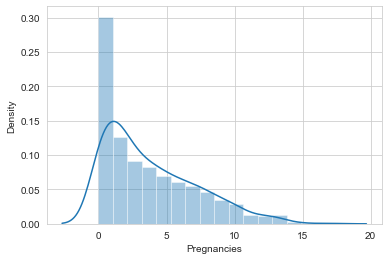

In [9]:
sns.distplot(df['Pregnancies'])

Hmmm, number of pregnancy reaching 20? lets check this

In [10]:
df.sort_values('Pregnancies', ascending = False).head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,NaN,33.6,0.212,38,1
274,13,106.0,70.0,NaN,NaN,34.2,0.251,52,0
357,13,129.0,NaN,30.0,NaN,39.9,0.569,44,1
86,13,106.0,72.0,54.0,NaN,36.6,0.178,45,0
72,13,126.0,90.0,NaN,NaN,43.4,0.583,42,1
691,13,158.0,114.0,NaN,NaN,42.3,0.257,44,1
635,13,104.0,72.0,NaN,NaN,31.2,0.465,38,1


If I had not done my research on pregnancies, i would have assumed this was an error, but apparently a woman can actually give birth more than 17 times. However if i was working with a medical firm, i will still have to cross check with them to see if its an error. Since i cant do that, i will leave it as it is.

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

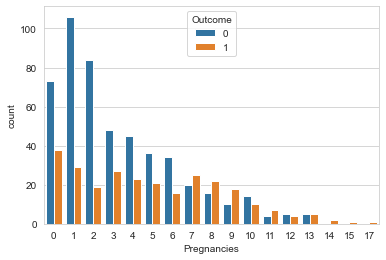

In [11]:
sns.countplot(data = df, x = 'Pregnancies',hue ='Outcome')

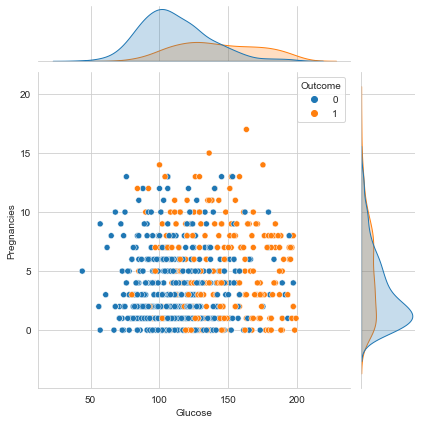

In [12]:
sns.jointplot(x='Glucose',y='Pregnancies',data=df,kind='scatter',hue='Outcome')

We can see from the two plots above that the women with a greater number of pregnancies have a higher chance of getting diabetes. Those that have a high number of pregnancy and dont have diabetes most likely have low levels of glucose in their body

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

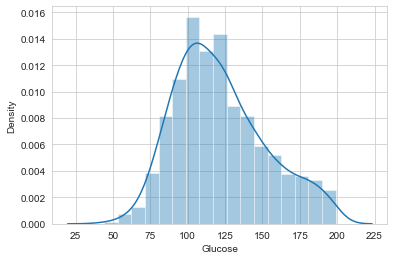

In [13]:
sns.distplot(df['Glucose'])

The distribution of glucose is reasonably normal and good for our model. lets check out the relationship between the glucose level and those that have diabetes

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

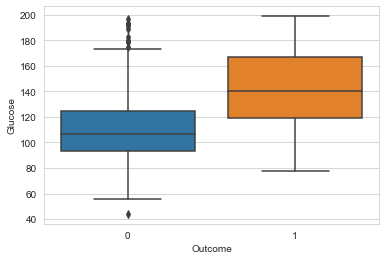

In [14]:
sns.boxplot(x='Outcome',y='Glucose',data=df)

As expected, those with a higher glucose level have a higher tendency of having diabetes

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

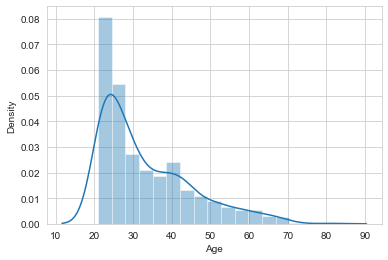

In [15]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

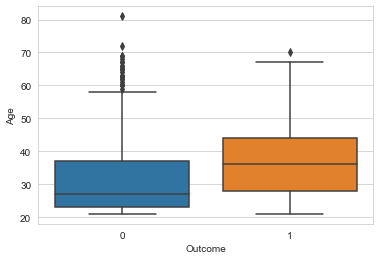

In [16]:
sns.boxplot(x='Outcome',y='Age',data=df)

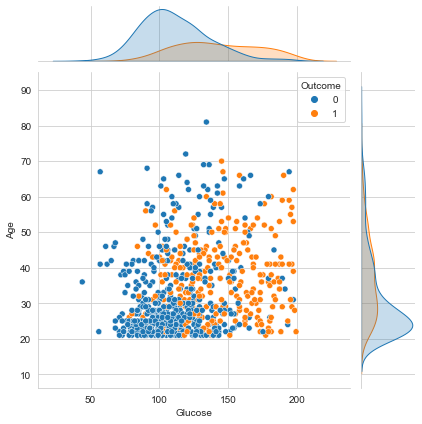

In [17]:
sns.jointplot(x='Glucose',y='Age',data=df,kind='scatter',hue='Outcome')

The two plots above show that the likelihood of diabetes occuring increases with age. For a younger person to have it, the glucose level has to be really high, amongst other things.

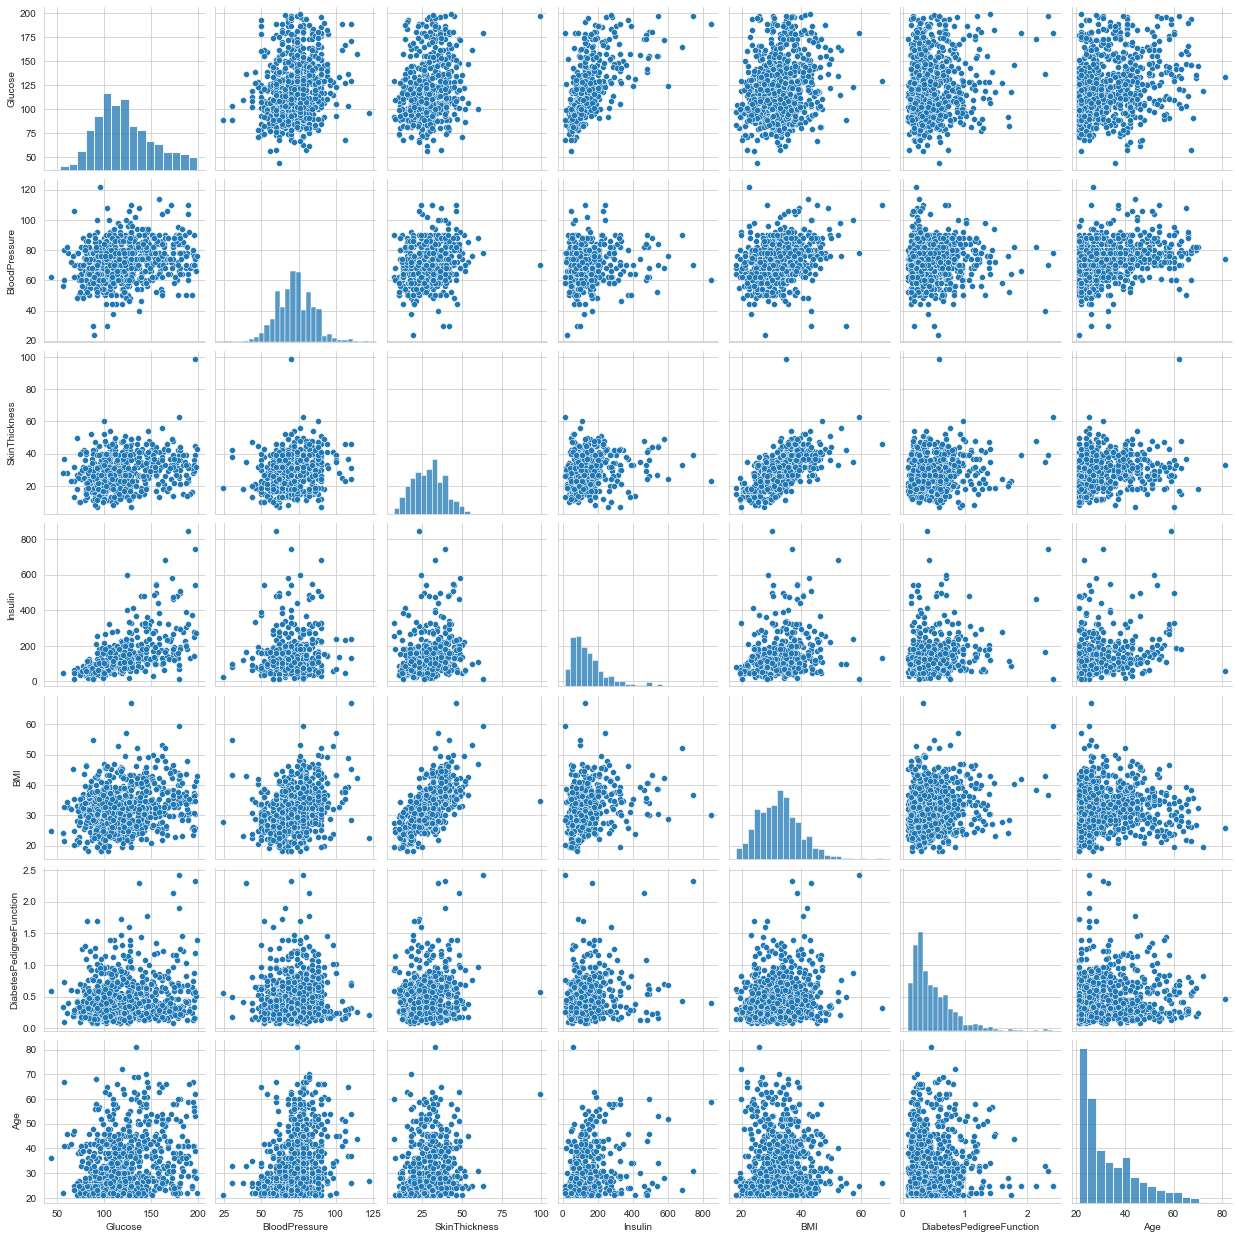

In [18]:
sns.set_style('whitegrid')
sns.pairplot(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

The paitplot above shows the individual relationship between the various chosen columns. generally there isnt much correlation, but we can see BMI and Skinthickness that have a linear relationship, we would explore each of these 

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

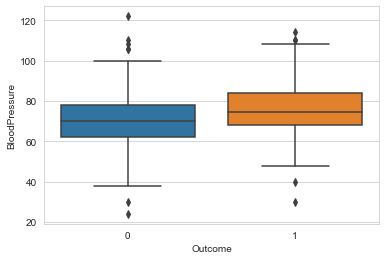

In [19]:
sns.boxplot(x='Outcome',y='BloodPressure',data=df)

In as much as i expected a more glaring difference, we can still see that the higher the blood pressure the greater the chances of having diabetes

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

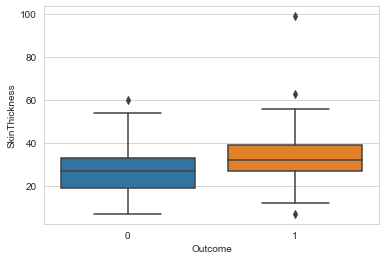

In [20]:
sns.boxplot(x='Outcome',y='SkinThickness',data=df)

what is the cause of that massive outlier, lets check it out

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

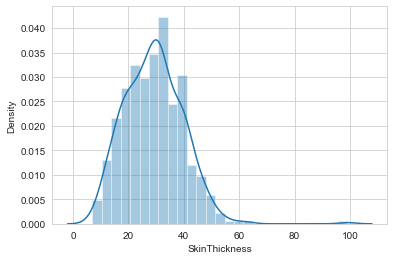

In [21]:
sns.distplot(df['SkinThickness'])

In [22]:
df.sort_values('SkinThickness', ascending = False).head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
211,0,147.0,85.0,54.0,NaN,42.8,0.375,24,0
86,13,106.0,72.0,54.0,NaN,36.6,0.178,45,0
275,2,100.0,70.0,52.0,57.0,40.5,0.677,25,0
532,1,86.0,66.0,52.0,65.0,41.3,0.917,29,0
99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
591,2,112.0,78.0,50.0,140.0,39.4,0.175,24,0


if you go back to the pairplot, you can see a clear linear relationship between skinthickness and BMI, a high bmi would correspond to a high skinthickness. However in the case of this outlier, yoy can see the BMI is low, meaning that value of 99 is a mistake. I will drop that row.

In [23]:
df.drop(index=579, axis = 0, inplace = True)

Lets explore the Insulin colume

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

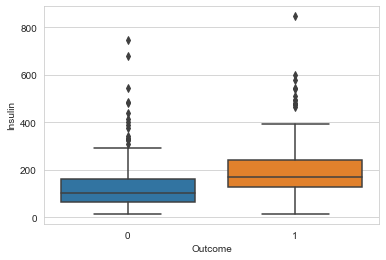

In [24]:
sns.boxplot(x='Outcome',y='Insulin',data=df)

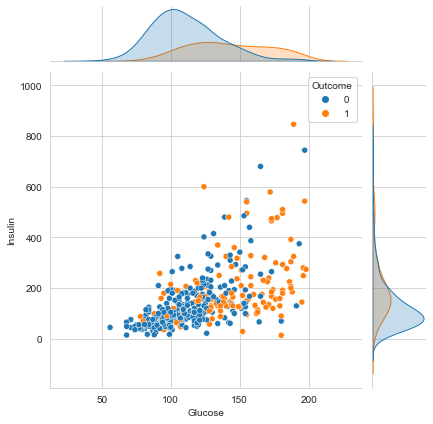

In [25]:
sns.jointplot(x='Glucose',y='Insulin',data=df,kind='scatter',hue='Outcome')

In [26]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We can see from the diagrams above that people with higher levels of Insulin have greater chances of having diabetes and the more the insulin, the more the glucose. Well this is wrong from what is biologically known. Insulin helps regulate blood sugar and as such, higher levels of Insulin should result in lower levels of glucose and hence lower chances of Diabetes. 

Therefore theres a problem with this feature and one of the reasons could be because as we can see above, up to half of the feature is missing. Trying to fill up those missing values would be greatly missleading. It would do much good to drop the column.

In [27]:
df = df.drop('Insulin',axis = 1)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

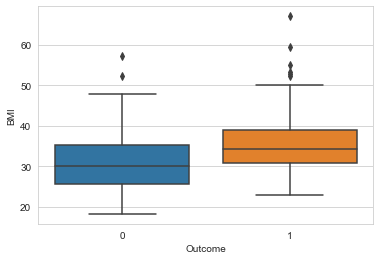

In [28]:
sns.boxplot(x='Outcome',y='BMI',data=df)

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

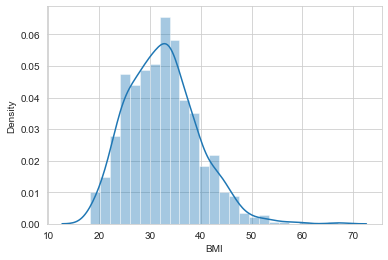

In [29]:
sns.distplot(df['BMI'])

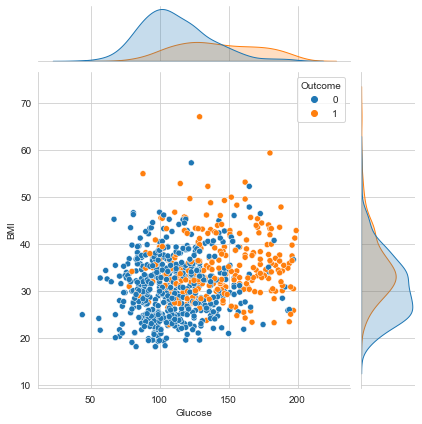

In [30]:
sns.jointplot(x='Glucose',y='BMI',data=df,kind='scatter',hue='Outcome')

The high BMI usually indicates people with unhealthy fat and obesity in extreme cases, and as such such people would have higher glucose levels and are at more risk of having diabetes. The figures above confirm this.\
Lets check out that outlier tho

In [31]:
df.sort_values('BMI', ascending = False).head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129.0,110.0,46.0,67.1,0.319,26,1
445,0,180.0,78.0,63.0,59.4,2.420,25,1
673,3,123.0,100.0,35.0,57.3,0.880,22,0
125,1,88.0,30.0,42.0,55.0,0.496,26,1
120,0,162.0,76.0,56.0,53.2,0.759,25,1
303,5,115.0,98.0,NaN,52.9,0.209,28,1
247,0,165.0,90.0,33.0,52.3,0.427,23,0
193,11,135.0,NaN,NaN,52.3,0.578,40,1
155,7,152.0,88.0,44.0,50.0,0.337,36,1
99,1,122.0,90.0,51.0,49.7,0.325,31,1


In cases like this where theres just one or two massive outliers, i prefer to drop them to make the feature more balanced

In [32]:
df.drop(index=177, axis = 0, inplace = True)

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

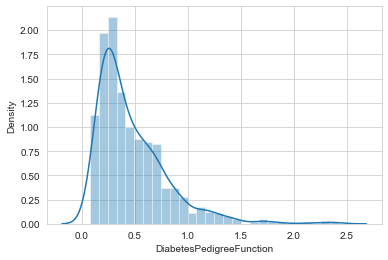

In [33]:
sns.distplot(df['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

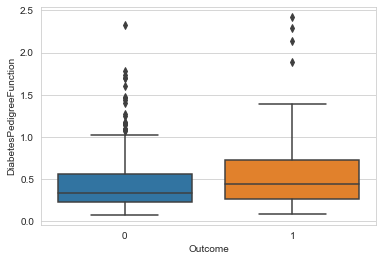

In [34]:
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df)

In [35]:
df.sort_values('DiabetesPedigreeFunction', ascending = False).head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180.0,78.0,63.0,59.4,2.420,25,1
228,4,197.0,70.0,39.0,36.7,2.329,31,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
370,3,173.0,82.0,48.0,38.4,2.137,25,1
45,0,180.0,66.0,39.0,42.0,1.893,25,1
58,0,146.0,82.0,NaN,40.5,1.781,44,0
371,0,118.0,64.0,23.0,NaN,1.731,21,0
593,2,82.0,52.0,22.0,28.5,1.699,25,0
621,2,92.0,76.0,20.0,24.2,1.698,28,0
395,2,127.0,58.0,24.0,27.7,1.600,25,0


<AxesSubplot:>

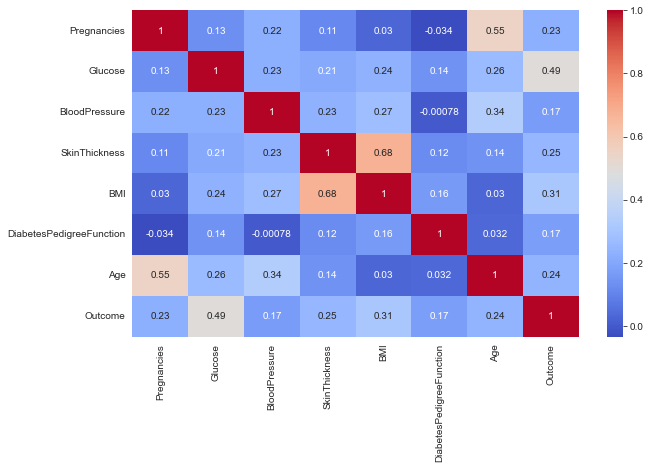

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Now we are done with the analysis, lets focus on filling up those empty spaces and performing other feature engineering

In [38]:
((df.isnull().sum())/766) * 100 
#To get the percentage of missing values in each column

Pregnancies                  0.000000
Glucose                      0.652742
BloodPressure                4.569191
SkinThickness               29.634465
BMI                          1.436031
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

Starting from the glucose column, we can see from the distplot above that the distribution of glucose is a normal distribution, so i would fill the empty spaces with the mean value

In [39]:
df['Glucose'].mean()

121.57818659658345

In [40]:
df['Glucose']=df['Glucose'].replace(np.nan,122)

Moving on to BMI

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

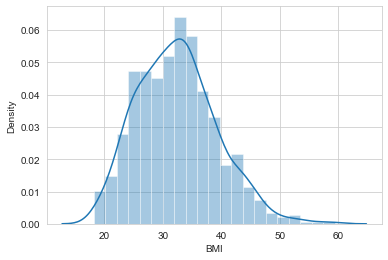

In [42]:
sns.distplot(df['BMI'])

The distribution here is also normal and thus the empty spaces would be filled with the mean value

In [43]:
df['BMI'].mean()

32.408609271523154

In [44]:
df['BMI']=df['BMI'].replace(np.nan,32.5)

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

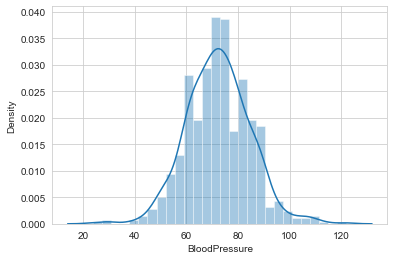

In [45]:
sns.distplot(df['BloodPressure'])

In [46]:
df['BloodPressure'].mean()

72.35704514363886

In [47]:
df['BloodPressure']=df['BloodPressure'].replace(np.nan,72.5)

In [48]:
df.isnull().sum()


Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We have successfully filled the empty spaces and it remains that of SkinThickness. In this case i cant just fill everything with a single value, that would greatly skew the data.

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

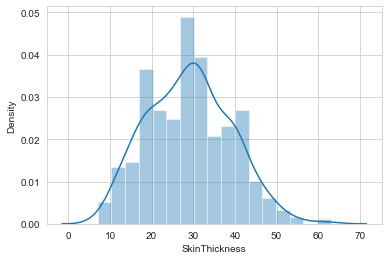

In [49]:
sns.distplot(df['SkinThickness'])

The idea is to fill in the empty spaces and still maintain this distribution

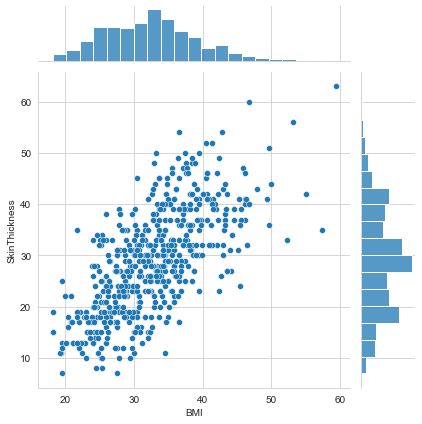

In [50]:
sns.jointplot(data=df,kind='scatter',x='BMI',y='SkinThickness')

From the figure above, we can see a strong linear relationship between the SkinThickness and the BMI, which means we could use the BMI to estimate what the SkinThickness could be

In [51]:
def impute_skinthickness(cols):
    SkinThickness = cols[0]                   #Takes in 2 coumns, skinthickness and BMI
    BMI = cols[1]
    
    
    if pd.isnull(SkinThickness):            #sarching throught the skinthicknesss column, if there is a null value
        if BMI < 30:                          #if the corresponding BMI to that null value is less than 30
            return np.random.randint(10,30)   #inpute a random number between 10 and 30
        if 30 <= BMI <= 40:                   #if the corresponding BMI to that null value is between 30 and 40
            return np.random.randint(20,40)   #inpute  a random number between 20 and 40
        else:                                 #if the null value isnt in the above category(i.e higher than 40)
            return np.random.randint(30,50)   #inpute a random number between 30 and 50
    else:                                     #if there is no null value in the skinthickness column
        return SkinThickness                 #leave the value there as it is

In [52]:
df['SkinThickness'] = df[['SkinThickness','BMI']].apply(impute_skinthickness, axis = 1)

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

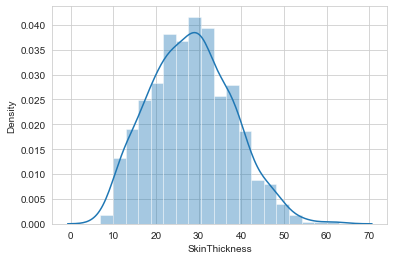

In [53]:
sns.distplot(df['SkinThickness'])

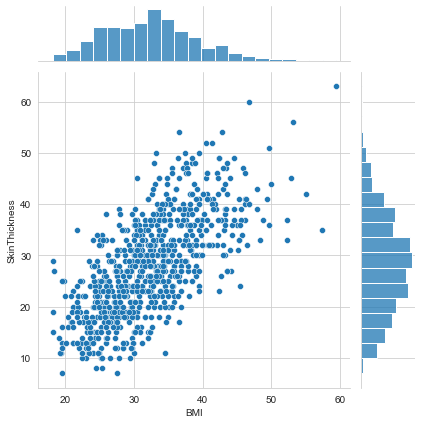

In [54]:
sns.jointplot(data=df,kind='scatter',x='BMI',y='SkinThickness')

We have now been able to fill the missing values in the skinthickness column and we did so without altering the initial distribution of the values

As something i usually do when engineering the features, i normally would try to make the distribution of each feature as normal as possible, especially in the case of a numerical feature. a normal distribution is good for any model we would use. Lucky for us most of the features are already normally distributed

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

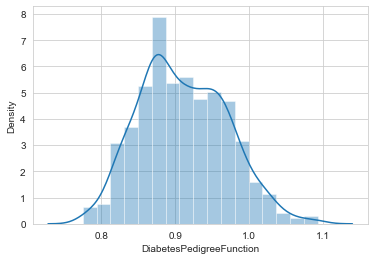

In [55]:
sns.distplot(df['DiabetesPedigreeFunction']**0.1)


In [56]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction']**0.1  #Power transform

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

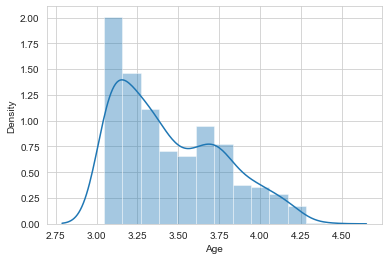

In [57]:
sns.distplot(np.log(df['Age']))

In [58]:
df['Age'] = np.log(df['Age'])   #Log transform

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

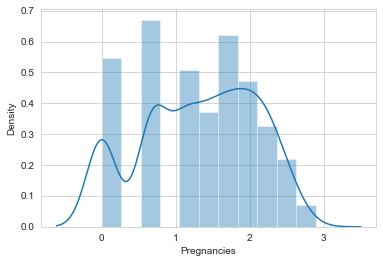

In [59]:
sns.distplot(np.log1p(df['Pregnancies']))

In [60]:
df['Pregnancies'] = np.log1p(df['Pregnancies'])  #log transform

In [61]:
df.duplicated().sum()  #Checking for duplicates

0

In [62]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.945910,148.0,72.0,35.0,33.6,0.954392,3.912023,1
1,0.693147,85.0,66.0,29.0,26.6,0.900597,3.433987,0
2,2.197225,183.0,64.0,11.0,23.3,0.961030,3.465736,1
3,0.693147,89.0,66.0,23.0,28.1,0.836126,3.044522,0
4,0.000000,137.0,40.0,35.0,43.1,1.086290,3.496508,1
...,...,...,...,...,...,...,...,...
763,2.397895,101.0,76.0,48.0,32.9,0.838107,4.143135,0
764,1.098612,122.0,70.0,27.0,36.8,0.897734,3.295837,0
765,1.791759,121.0,72.0,23.0,26.2,0.868794,3.401197,0
766,0.693147,126.0,60.0,36.0,30.1,0.900083,3.850148,1


Now we are done with all the feature engineering, we can now split our data and and train on it

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.drop('Outcome',axis=1).values
Y = df['Outcome'].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

An important step would be to scale our data

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
X_train = scaler.fit_transform(X_train)

In [69]:
X_test = scaler.transform(X_test)

I will try using the RandomForestClassifier first tp see how it performs

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
rfc_pred = rfc.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.59      0.59      0.59        49

    accuracy                           0.74       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.74      0.74      0.74       154



This is not a bad performance, but it could be better, lets try KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors=21)  #Using a random number for the no of neighbors

In [77]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [78]:
pred = knn.predict(X_test)

In [79]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.63      0.59      0.61        49

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.76      0.76      0.76       154



There is a little improvement, but lets optimize the no of neighbors

In [80]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

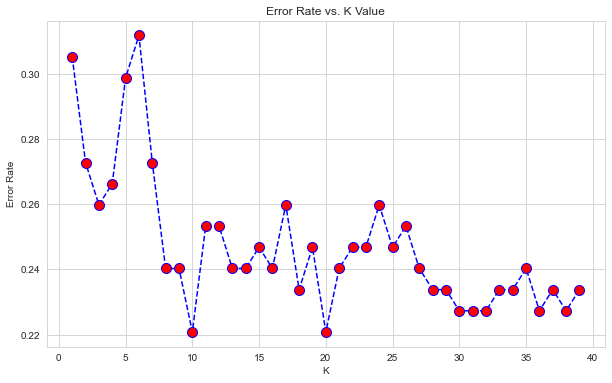

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above chart, you can see the different values of K and the ammont of error they give, now we can select our k with very little error, however you dont want to go for the ones with the lowest error because that could lead to over fitting

In [82]:
knn = KNeighborsClassifier(n_neighbors=18)

In [83]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [84]:
pred = knn.predict(X_test)

In [85]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.65      0.57      0.61        49

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



A better result but not good enough, lemme try and do more feature engineering

In [86]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.945910,148.0,72.0,35.0,33.6,0.954392,3.912023,1
1,0.693147,85.0,66.0,29.0,26.6,0.900597,3.433987,0
2,2.197225,183.0,64.0,11.0,23.3,0.961030,3.465736,1
3,0.693147,89.0,66.0,23.0,28.1,0.836126,3.044522,0
4,0.000000,137.0,40.0,35.0,43.1,1.086290,3.496508,1
...,...,...,...,...,...,...,...,...
763,2.397895,101.0,76.0,48.0,32.9,0.838107,4.143135,0
764,1.098612,122.0,70.0,27.0,36.8,0.897734,3.295837,0
765,1.791759,121.0,72.0,23.0,26.2,0.868794,3.401197,0
766,0.693147,126.0,60.0,36.0,30.1,0.900083,3.850148,1


In [87]:
sf = df.copy()  
#I want to work on the data frame, while maintaining the original dataframe, so i will copy it and work on the copy

In [88]:
sf

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.945910,148.0,72.0,35.0,33.6,0.954392,3.912023,1
1,0.693147,85.0,66.0,29.0,26.6,0.900597,3.433987,0
2,2.197225,183.0,64.0,11.0,23.3,0.961030,3.465736,1
3,0.693147,89.0,66.0,23.0,28.1,0.836126,3.044522,0
4,0.000000,137.0,40.0,35.0,43.1,1.086290,3.496508,1
...,...,...,...,...,...,...,...,...
763,2.397895,101.0,76.0,48.0,32.9,0.838107,4.143135,0
764,1.098612,122.0,70.0,27.0,36.8,0.897734,3.295837,0
765,1.791759,121.0,72.0,23.0,26.2,0.868794,3.401197,0
766,0.693147,126.0,60.0,36.0,30.1,0.900083,3.850148,1


<AxesSubplot:>

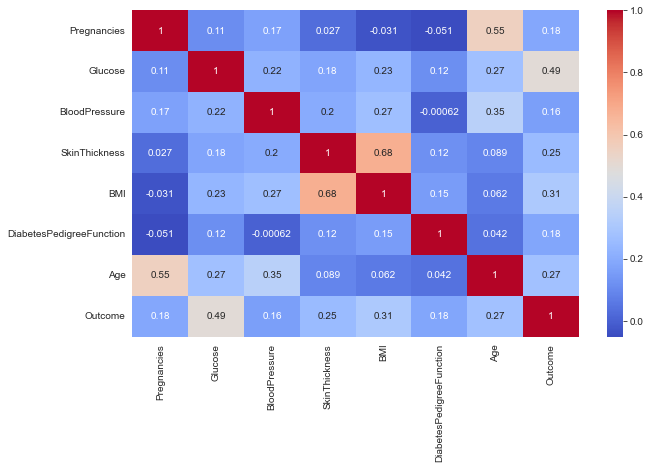

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(sf.corr(),cmap='coolwarm',annot=True)

From the heatmap, we can see Blood Pressure and DiabetesPedigreeFunction have a very low correlation with the target. This could just cause noise to the model and confuse it. i will remove those features

In [90]:
sf.drop(['BloodPressure','DiabetesPedigreeFunction'],axis = 1, inplace = True)

Now lets train our model like we did above and see the result

In [91]:
X = sf.drop('Outcome',axis=1).values
Y = sf['Outcome'].values

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=45)

In [125]:
scaler = MinMaxScaler()

In [126]:
X_train = scaler.fit_transform(X_train)

In [127]:
X_test = scaler.transform(X_test)

In [128]:
knn = KNeighborsClassifier(n_neighbors=20)  #Once again choosing a random no of neighbours

In [129]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [130]:
pred = knn.predict(X_test)

In [131]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.79      0.60      0.68        55

    accuracy                           0.80       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.80      0.80      0.79       154



Now this is a much better result, lets optimize the no of neighbors

In [132]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

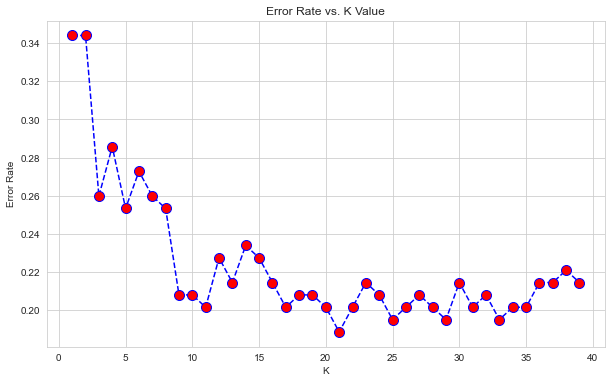

In [133]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [134]:
knn = KNeighborsClassifier(n_neighbors=25)

In [135]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [136]:
pred = knn.predict(X_test)

In [137]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        99
           1       0.78      0.64      0.70        55

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



This is a much better result,it is not the best, so you can still do more feature enginnering and try out other things. I will leave it at this. Note that behind the scenes i have tried other models but these two were the best.

Reasons for this result, irrespective of all the work done on it could be because we have just a hand ful of samples to train on, just about 750 samples, this usually is considered small. Plus the fact that the features dont correlate much with the target, therefore the model is not able to pick a particular trend or pattern.